In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

import os
df = pd.read_csv("master.csv")

In [2]:
plt.rcParams['figure.figsize'] = [8, 6]

# 1. EDA

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [4]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation
31755,Uzbekistan,2017,female,75+ years,3.0,32388600,0.009263,Uzbekistan2017,0.691258,62081323299,1916.764642,G.I. Generation


In [5]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
14862,Latvia,2000,male,5-14 years,5.0,164874,3.03,Latvia2000,0.727,"7,93,77,58,980",3494.0,Millenials
5545,Chile,2008,female,15-24 years,110.0,1384953,7.94,Chile2008,NaN,"1,79,63,84,96,279",11653.0,Millenials
25718,Turkey,2015,female,5-14 years,18.0,6100840,0.30,Turkey2015,NaN,"8,59,79,68,72,794",11961.0,Generation Z
8981,Finland,2007,male,25-34 years,101.0,334628,30.18,Finland2007,NaN,"2,55,38,46,15,385",51089.0,Generation X
7329,Czech Republic,2009,female,75+ years,42.0,450517,9.32,Czech Republic2009,NaN,"2,06,17,99,82,164",20748.0,Silent


In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


In [7]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [9]:
df = df.drop(['country-year', 'HDI for year'], axis=1)

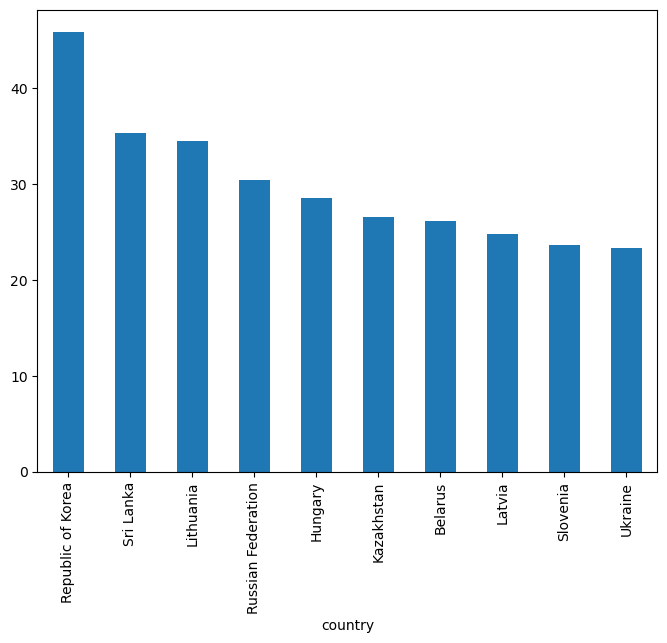

In [10]:
df.groupby('country').agg('mean')['suicides/100k pop'].nlargest(10).plot(kind='bar');

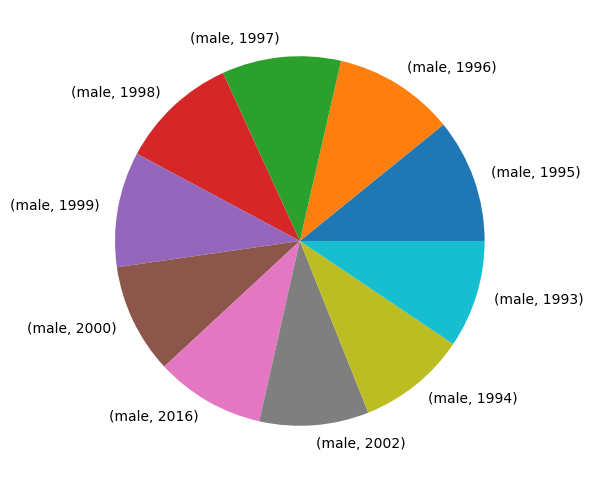

In [11]:
ax = df.groupby(['sex', 'year']).mean().nlargest(10, columns = 'suicides/100k pop').plot(y='suicides/100k pop', kind='pie')
ax.get_legend().remove()
ax.get_yaxis().set_visible(False)

<AxesSubplot:xlabel='year', ylabel='suicides/100k pop'>

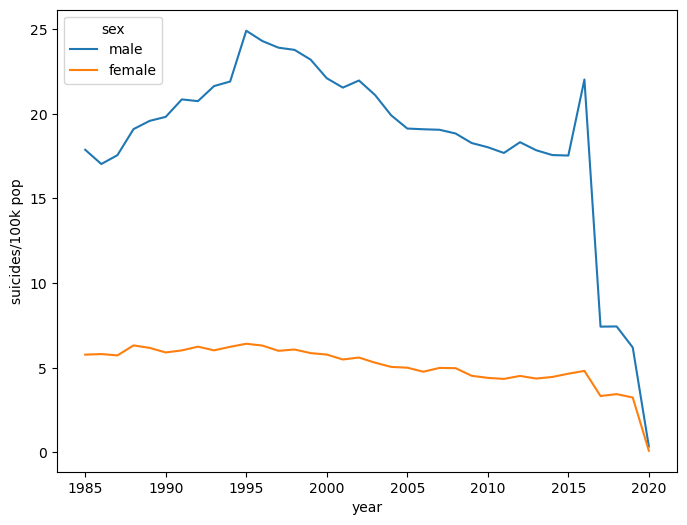

In [12]:
sns.lineplot(data=df, x='year', y='suicides/100k pop', hue='sex', ci=None)

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides_no'>

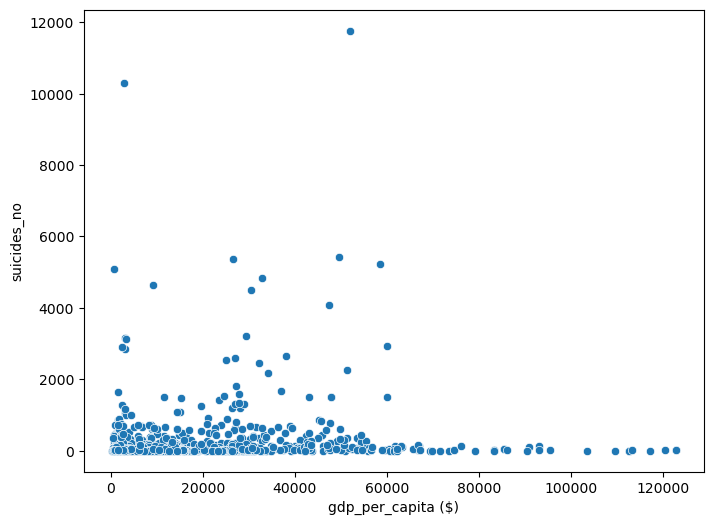

In [13]:
sns.scatterplot(data=df.sample(1000), x='gdp_per_capita ($)', y='suicides_no')

In [14]:
df.groupby('age').mean()['suicides/100k pop']

age
15-24 years     8.076554
25-34 years    11.107635
35-54 years    14.031126
5-14 years      0.559401
55-74 years    14.952714
75+ years      21.505186
Name: suicides/100k pop, dtype: float64

<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

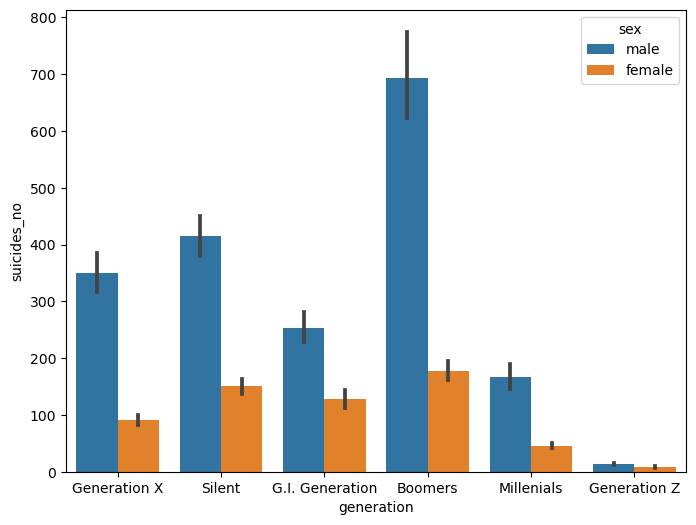

In [15]:
sns.barplot(data=df, x='generation', y='suicides_no', hue='sex')

<AxesSubplot:>

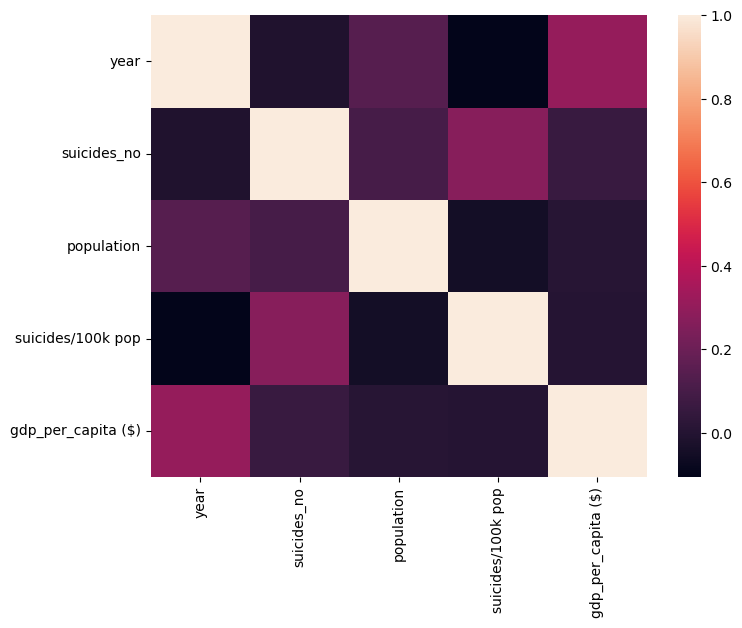

In [16]:
sns.heatmap(df.corr())

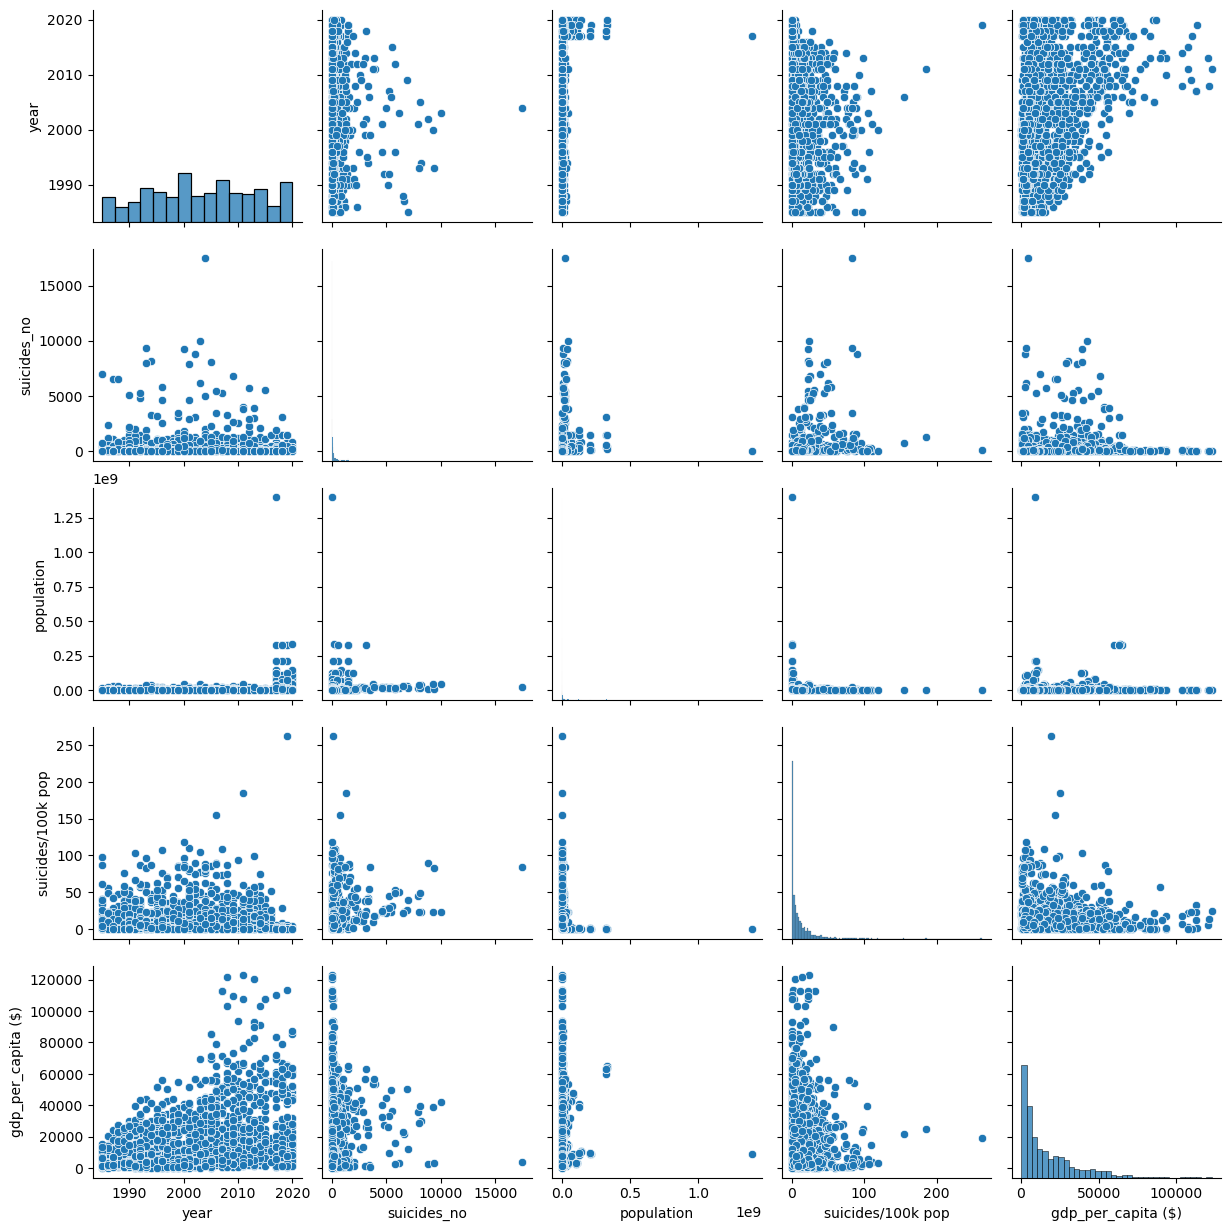

In [17]:
sns.pairplot(data=df.sample(2000))

# 2. Feature engineering

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
df.sex = (df.sex == 'female')
df = df.rename(columns={'sex':'is_female'})

In [20]:
df.age = df.age.str.findall(r'\d+').map(lambda x: int(x[0]) // 10)
df.age = df.age.replace([5,7], [4,5])
df = df.rename({'age':'age_group'})

#### We're gonna fill the missing values in the column _suicides\_no_ with the front fill or back fill method of suicides of data we have with respect to the country and sex.

In [21]:
df = df.fillna(df.groupby(['country', 'is_female']).transform(lambda x: x.fillna(method='ffill'))).transform(lambda x: x.fillna(method='bfill'))

In [22]:
df.isna().sum().sum()

0

In [23]:
df = df.rename(columns={' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita', 'suicides/100k pop':'suicides/100kpopulation'})

In [24]:
df.gdp_for_year = df.gdp_for_year.str.replace(',', '').astype('float64')

In [25]:
df.to_csv('/data/to_train.csv')